In [1]:
import numpy as np
from mpc_v2 import MPC
from CustomTrajectory import SmoothTrajectory

horizon = 10
dt = 0.045
# waypoints = np.array([[i*5, i ** 2] for i in range(10)])

waypoints = [(0, 0), (5, 0), (10, 0), (20, 2), (40, 5), (60, 0), (80, -20), (100, -30), (200, 30), (230, 30)] 
resolution = 1
traj_obj = SmoothTrajectory(waypoints, resolution)
traj_obj.generate()
trajectory = np.array([[traj_obj.x[i], traj_obj.y[i]] for i in range(len(traj_obj.x))])

# trajectory = waypoints

done = False
initial_state = np.array([0.0, 0.0, 0.0, 5])    # (X, Y, Orientation, Velocity)
states = np.array([initial_state])

mpc = MPC(time_step=dt, horizon=horizon, initial_state=initial_state)

while not done:
      # print(f'Iteration: {i}')
      new_state, steer, throttle, done = mpc.mpc_run(trajectory=trajectory)
      # print(new_state)
      states = np.append(states, np.array([new_state]), axis=0)


Cost:  12.375
Cost:  12.375
Cost:  12.375000001357868
Cost:  12.375
Cost:  12.375000001086292
Cost:  12.375
Cost:  12.375000000844896
Cost:  12.375
Cost:  12.375000000633673
Cost:  12.375
Cost:  12.37500000045262
Cost:  12.375
Cost:  12.37500000030175
Cost:  12.375
Cost:  12.37500000018105
Cost:  12.375
Cost:  12.375000000090525
Cost:  12.375
Cost:  12.375000000030175
Cost:  12.375
Cost:  12.375
Cost:  12.35910352645983
Cost:  12.35910352645983
Cost:  12.35910352716592
Cost:  12.35910352645983
Cost:  12.359103527123677
Cost:  12.35910352645983
Cost:  12.359103526978835
Cost:  12.35910352645983
Cost:  12.359103526852099
Cost:  12.35910352645983
Cost:  12.359103526743475
Cost:  12.35910352645983
Cost:  12.359103526652945
Cost:  12.35910352645983
Cost:  12.359103526580526
Cost:  12.35910352645983
Cost:  12.359103526526212
Cost:  12.35910352645983
Cost:  12.359103526490006
Cost:  12.35910352645983
Cost:  12.3591035264719
Cost:  12.351027554609034
Cost:  12.351027554609034
Cost:  12.3510275

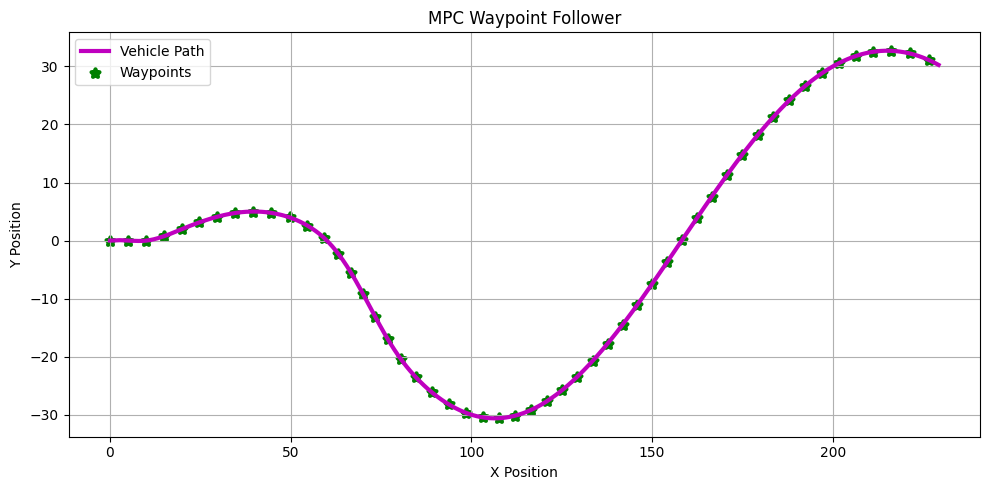

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(states[:, 0], states[:, 1], 'm', linewidth=3, label='Vehicle Path')
plt.scatter(trajectory[::5, 0], trajectory[::5, 1], linewidths=3, marker='*', color='green', label='Waypoints')
plt.title('MPC Waypoint Follower')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()